In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
sb.set()

In [2]:
raw_csv_data = pd.read_csv('October data after filtering.csv')
raw_csv_data

,WHP,WHT,tbg end depth\n(ORKB),tbg end to top perf.,liner size,MD\n(top perf.),TVD\n(top perf.),Tr,Rsb,API,...,Pwf,Pr-Pb,WC%,IG (MMCFD),D/S,Reservoir,tbg type,BFPD,BOPD,GG
0,105,110,10139,838,7,10454,9909,240,359,31.8,...,1337,-100,1,2.0,900,Nezzazat,Normal,1285,1277,2.6
1,95,118,10139,838,7,10454,9909,240,359,31.8,...,1436,-68,1,1.5,710,Nezzazat,Normal,1118,1111,1.9
2,115,118,10139,838,7,10454,9909,240,359,31.8,...,1383,-78,1,1.5,870,Nezzazat,Normal,1224,1217,1.9
3,105,118,10139,838,7,10454,9909,240,359,31.8,...,1354,-66,1,2.0,860,Nezzazat,Normal,1328,1320,2.5
4,105,122,10139,838,7,10454,9909,240,359,31.8,...,1433,50,1,1.0,800,Nezzazat,Normal,1421,1412,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1779,120,186,10508,292,7,10800,10646,250,279,26.7,...,2623,1027,83,4.3,1280,Nubia,Big bore,5106,868,4.5
1780,115,186,10508,292,7,10800,10646,250,279,26.7,...,2620,1027,84,4.3,1287,Nubia,Big bore,5288,862,4.5
1781,143,187,10508,292,7,10800,10646,250,279,26.7,...,2637,1027,90,3.6,1258,Nubia,Big bore,4279,428,4.6
1782,135,188,10508,292,7,10800,10646,250,279,26.7,...,2631,1027,92,3.0,1173,Nubia,Big bore,4688,375,3.1


In [3]:
data = pd.get_dummies(raw_csv_data, drop_first=True)
data.head()

,WHP,WHT,tbg end depth\n(ORKB),tbg end to top perf.,liner size,MD\n(top perf.),TVD\n(top perf.),Tr,Rsb,API,...,Pwf,Pr-Pb,WC%,IG (MMCFD),D/S,BFPD,BOPD,GG,Reservoir_Nubia,tbg type_Normal
0,105,110,10139,838,7,10454,9909,240,359,31.8,...,1337,-100,1,2.0,900,1285,1277,2.6,0,1
1,95,118,10139,838,7,10454,9909,240,359,31.8,...,1436,-68,1,1.5,710,1118,1111,1.9,0,1
2,115,118,10139,838,7,10454,9909,240,359,31.8,...,1383,-78,1,1.5,870,1224,1217,1.9,0,1
3,105,118,10139,838,7,10454,9909,240,359,31.8,...,1354,-66,1,2.0,860,1328,1320,2.5,0,1
4,105,122,10139,838,7,10454,9909,240,359,31.8,...,1433,50,1,1.0,800,1421,1412,1.6,0,1


In [4]:
data.columns

Index(['WHP', 'WHT', 'tbg end depth\n(ORKB)', 'tbg end to top perf.',
       'liner size', 'MD\n(top perf.)', 'TVD\n(top perf.)', 'Tr', 'Rsb', 'API',
       '?w', '?g', 'Pr', 'Pwf', 'Pr-Pb', 'WC%', 'IG (MMCFD)', 'D/S', 'BFPD',
       'BOPD', 'GG', 'Reservoir_Nubia', 'tbg type_Normal'],
      dtype='object')

In [5]:
data.rename(columns = {'Reservoir_Nubia':'Reservoir', 'tbg type_Normal':'tbg type'}, inplace = True)

In [6]:
columns_to_drop = ['tbg end depth\n(ORKB)', 'tbg end to top perf.', 'liner size', 'MD\n(top perf.)', 'TVD\n(top perf.)',
                    'Rsb', 'API', 'D/S', 'tbg type', 'Pwf', 'BFPD', 'BOPD', 'GG']

In [7]:
targets = data['BFPD'].values

inputs = data.drop(columns_to_drop, axis=1).values

In [8]:
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=1)

In [9]:
reg = ExtraTreesRegressor(max_depth=50, n_estimators=300)
reg.fit(x_train, y_train)

ExtraTreesRegressor(max_depth=50, n_estimators=300)

In [10]:
y_hat = reg.predict(x_train)

0.9999866368682157

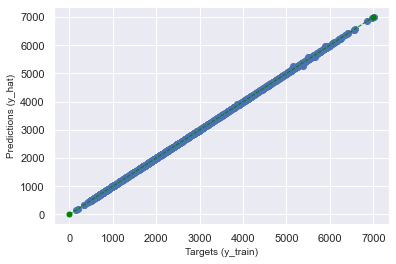

In [11]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=10)
plt.ylabel('Predictions (y_hat)',size=10)
plt.plot([0,7000], [0, 7000], color='green', marker='o', linestyle='dashed', linewidth=1, markersize=5)
reg.score(x_train, y_train)

In [12]:
y_hat_test = reg.predict(x_test)

0.9629540109005905

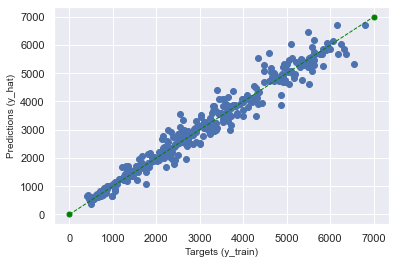

In [13]:
plt.scatter(y_test, y_hat_test)
plt.xlabel('Targets (y_train)',size=10)
plt.ylabel('Predictions (y_hat)',size=10)
plt.plot([0,7000], [0, 7000], color='green', marker='o', linestyle='dashed', linewidth=1, markersize=5)
reg.score(x_test, y_test)

In [14]:
mean_absolute_error(y_test, y_hat_test), np.sqrt(mean_squared_error(y_test, y_hat_test))

(211.31066760037345, 307.0283885667531)

Text(0.5, 1.0, 'Residuals PDF')

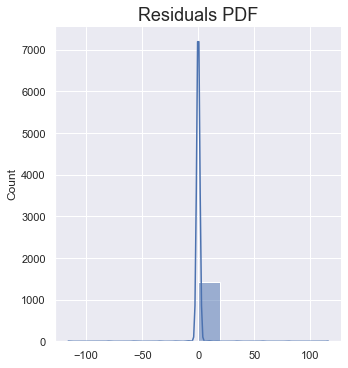

In [15]:
sb.displot(y_hat - y_train, kde=True)

plt.title("Residuals PDF", size=18)

Text(0.5, 1.0, 'Residuals PDF')

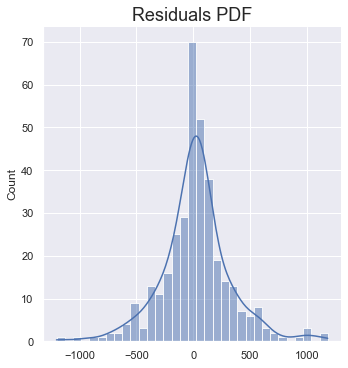

In [16]:
sb.displot(y_hat_test - y_test, kde=True)

plt.title("Residuals PDF", size=18)

In [17]:
importances_rf = pd.Series(reg.feature_importances_, index = data.columns.drop(columns_to_drop))
sorted_importances_rf = importances_rf.sort_values()
sorted_importances_rf

WHP           0.011263
?g            0.011822
Pr            0.016420
Pr-Pb         0.020982
Reservoir     0.042316
?w            0.053226
WC%           0.060903
Tr            0.095224
IG (MMCFD)    0.141912
WHT           0.545934
dtype: float64

<AxesSubplot:>

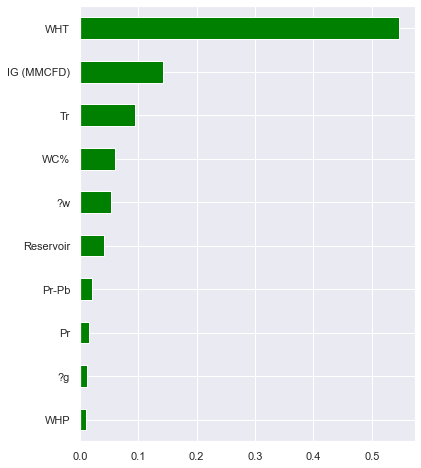

In [18]:
plt.figure(figsize = [6, 8])
sorted_importances_rf.plot(kind='barh', color='green')